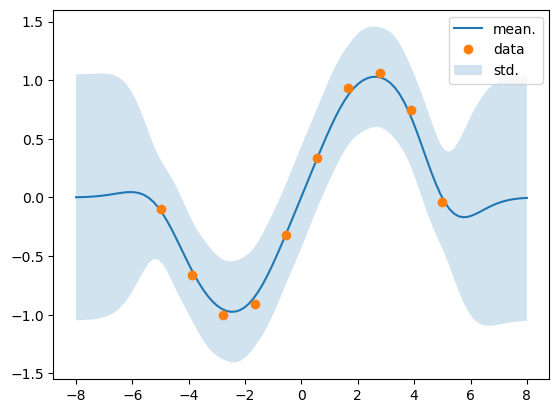

PyObject <matplotlib.legend.Legend object at 0x7f96193cc9a0>

In [10]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = θ₁*exp(-0.5*inv(θ₂^2)*(x₁ - x₂)^2) + θ₃*(x₁==x₂)

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()